<a href="https://colab.research.google.com/github/GustiNgurahRejski12/Pemograman_Python/blob/main/TUGAS_PRESENSI_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image
from imutils import paths
import numpy as np
import os
import cv2

In [12]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset2")
data = []
labels = []

[INFO] loading images...


In [13]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [14]:
print(labels)

['GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [15]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [16]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [17]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.3, shuffle=True)
print(trainX.shape)
print(testX.shape)

(411, 128, 128, 3)
(177, 128, 128, 3)


In [33]:
model = Sequential()
model.add(Convolution2D(64, 16, 3, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu')) 
model.add(Dense(5, activation='softmax'))

In [19]:
#  model = Sequential(
#      [
#     Flatten(input_shape=(64*64*3,)),
#      Dense(144, activation="relu", name="layer1"),
#      Dense(24, activation="relu", name="layer2"),
#      Dense(24, activation="relu", name="layer3"),
#      Dense(24, activation="relu", name="layer4"),
#      Dense(3, activation="softmax", name="layer5"),
#      ]
#  )

In [34]:
print("[INFO] training network ...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network ...
Epoch 1/100
13/13 [==============================] - 4s 324ms/step - loss: 1.6224 - accuracy: 0.2092 - val_loss: 1.6286 - val_accuracy: 0.1921
Epoch 2/100
13/13 [==============================] - 4s 302ms/step - loss: 1.6229 - accuracy: 0.1995 - val_loss: 1.6089 - val_accuracy: 0.1977
Epoch 3/100
13/13 [==============================] - 4s 303ms/step - loss: 1.6120 - accuracy: 0.1800 - val_loss: 1.6056 - val_accuracy: 0.2429
Epoch 4/100
13/13 [==============================] - 4s 309ms/step - loss: 1.6066 - accuracy: 0.2165 - val_loss: 1.6082 - val_accuracy: 0.2034
Epoch 5/100
13/13 [==============================] - 4s 315ms/step - loss: 1.5977 - accuracy: 0.2263 - val_loss: 1.5913 - val_accuracy: 0.2768
Epoch 6/100
13/13 [==============================] - 4s 303ms/step - loss: 1.5692 - accuracy: 0.2871 - val_loss: 1.5245 - val_accuracy: 0.2712
Epoch 7/100
13/13 [==============================] - 4s 294ms/step - loss: 1.4902 - accuracy: 0.3406 - val_loss: 1

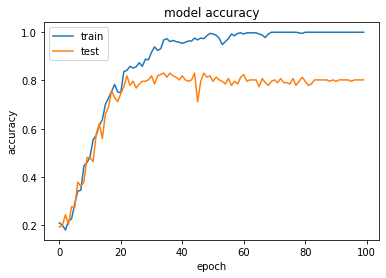

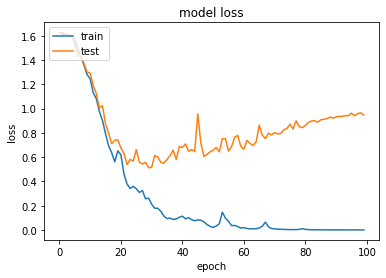

In [35]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
print("[INFO] evaluating network ...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network ...
              precision    recall  f1-score   support

      GMB_06       0.79      0.53      0.63        36
      GMB_07       0.82      0.89      0.85        36
      GMB_08       0.69      0.88      0.77        33
      GMB_09       0.84      0.91      0.88        35
      GMB_10       0.88      0.81      0.85        37

    accuracy                           0.80       177
   macro avg       0.81      0.80      0.80       177
weighted avg       0.81      0.80      0.80       177

